<a href="https://colab.research.google.com/github/dharalakshmi/NNDL/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

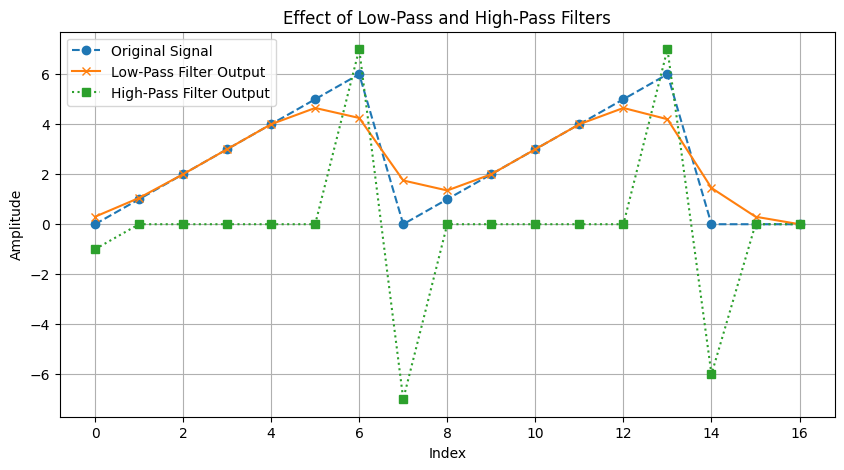

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the signal and filters
X = np.array([0,1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 0, 0])
H_L = np.array([0.05, 0.2, 0.5, 0.2, 0.05])
H_H = np.array([-1, 2, -1])

# Perform convolution
y_low = np.convolve(X, H_L, mode='same')  # Keep the same length
y_high = np.convolve(X, H_H, mode='same')

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(X, label="Original Signal", linestyle='dashed', marker='o')
plt.plot(y_low, label="Low-Pass Filter Output", linestyle='solid', marker='x')
plt.plot(y_high, label="High-Pass Filter Output", linestyle='dotted', marker='s')

plt.legend()
plt.title("Effect of Low-Pass and High-Pass Filters")
plt.xlabel("Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


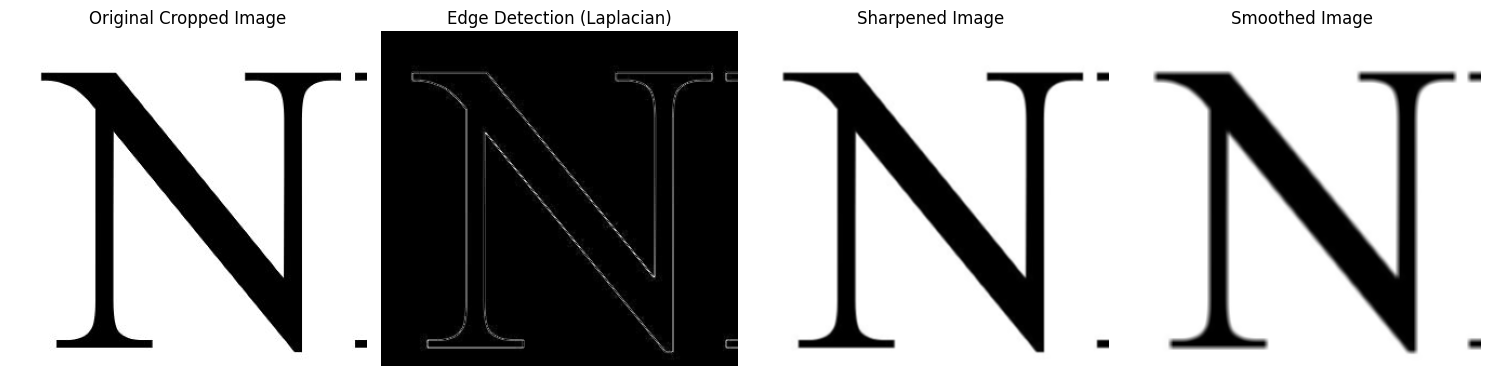

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage.io import imread
from skimage.color import rgb2gray

# Load the image
image_path = "Neural.JPG"
im = imread(image_path)
img = rgb2gray(im) * 255  # Convert to grayscale and scale

# Crop a section of the image
img1 = img[40:350, 20:350]

# Define filters
fil1 = np.array([[ 0, -1, 0],
                 [-1, 4, -1],
                 [ 0, -1, 0]])  # Edge detection (Laplacian)

fil2 = np.array([[ 0.2, 0.5, 0.2],
                 [ 0.5, 1.0, 0.5],
                 [ 0.2, 0.5, 0.2]])  # Sharpening

fil3 = np.ones((5, 5)) / 25  # Averaging (smoothing)

# Apply convolution
grad1 = signal.convolve2d(img1, fil1, boundary='symm', mode='same')
grad2 = signal.convolve2d(img1, fil2, boundary='symm', mode='same')
grad3 = signal.convolve2d(img1, fil3, boundary='symm', mode='same')

# Display results
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(img1, cmap='gray')
axes[0].set_title("Original Cropped Image")
axes[0].axis("off")

axes[1].imshow(np.abs(grad1), cmap='gray')
axes[1].set_title("Edge Detection (Laplacian)")
axes[1].axis("off")

axes[2].imshow(grad2, cmap='gray')
axes[2].set_title("Sharpened Image")
axes[2].axis("off")

axes[3].imshow(grad3, cmap='gray')
axes[3].set_title("Smoothed Image")
axes[3].axis("off")

plt.tight_layout()
plt.show()